###Supervised Learning Algorithms

Classification is a fundamental class of ML algorithms. The algorithms here are selected to go over the concepts and move to more complex examples that can be built from scratch. These concepts have wide applications.

A **classifier** $h$ can be viewed as a mapping between a d-dimensional feature vector q(x) and a k-dimensional label $y$, $(R^d - R-^k)$

Model selection is finding the right classifier, selecting a sufficient number of parameters - degrees of freedom to avoid underfitting or overfitting to training data.


####**Perception Algorithm**

A Perceptron is a linear classification model, and we define it as $h(x) = sign(\theta_1, x_1 + ...\theta_dx_d + \theta_0)$

The sign function of the inner product between the parameter theta and the feature input x maps to $(+1, -1)$. Geometrically $theta_x + theta_0 = 0$ a hyperplane in d-dimensional space uniquely determined by the vector theta. Any point that lies on the same side as the normal theta is +1 and any point on the opposite side is -1. As a result $theta_x + theta_0 = 0$ represents the decision boundary.

**How to measure the performance?** One way is counting the performance with $error_n(theta)$

$$
\text{error}_n(\theta) = \frac{1}{n} \sum_{i=1}^n \mathbb{I}[y_i \neq h(x_i; \theta)] = \frac{1}{n} \sum_{i=1}^n \mathbb{I}[y_i(\theta \cdot x_i + \theta_0) \leq 0]
$$

Another way to measure performance is with **confusion matrix**. To better visualize the performance of the classifier under different thresholds we construct the **ROC and precision-recall curve**. The quality of ROC curve is summarized by a single number using the area under curve AUC. Higher AUC scores are better with a maximum of AUC = 1.

In Information Retrieval (IR) systems it is common to use precision-recall plot. The **precision-recall curve** (precision versus recall as we vary the classification threshold) can be summarized by a single number using the mean precision by averaging over the recall values, which approximates the area under the curve.

Additionally for a fixed threshold we can summarize the performance in a single statistic called the **F1 score** $(F1 = 2PR/(P +R))$.

**Perceptron is a mistaken driven algorithm**. It starts with $\theta = 0$ and adjusts to $\theta$ for each training example until there are no more classification mistakes (data is linearly separable). **The update rule is summarized as** if $y_i != h(x_i; \theta^k)$ then $\theta^k+1 = \theta^k + y_ix_i$ and $\theta^(k+1)_0+1 = \theta^k_0 + y_i$
**Following is the pseudo-code for the algorithm**, the Perceptron class has two functions $fit$ and $predict$. In the $fit$ function we take the training data $X$ and labels $y$ and upon encountering an error we update the learning rate and the theta derived at that point. In the $predict$ function we make a prediction on the test data based on the sign of the decision boundary.

The algorithm can be seen as an SGD and it minimizes a hinge loss function.

$$
L_h(z) = \frac{1}{n} \sum_{i=1}^{n} \max\{1 - z_i, 0\} = \frac{1}{n} \sum_{i=1}^{n} \max\{1 - y_i(\theta^\top x_i - \theta_0), 0\}
$$

$
\begin{aligned}
&\textbf{Class Perceptron} \\
&\quad \text{function fit}(X, y): \\
&\quad \quad k = 1 \\
&\quad \quad \text{for epoch } = 1, 2, \dots, \text{num\_epochs} \\
&\quad \quad \quad \text{for } i = 1, 2, \dots, N: \\
&\quad \quad \quad \quad \text{if } y_i(\theta \cdot x_i + \theta_0) \leq 0: \\
&\quad \quad \quad \quad \quad \eta = \frac{1}{k+1} \\
&\quad \quad \quad \quad \quad k \leftarrow k + 1 \\
&\quad \quad \quad \quad \quad \theta = \theta + \eta y_i x_i \quad \text{\# updates to theta} \\
&\quad \quad \quad \quad \quad \theta_0 = \theta_0 + \eta y_i \quad \text{\# updates to theta} \\
&\quad \quad \quad \quad \text{end if} \\
&\quad \quad \text{return } \theta, \theta_0 \\
\\
&\quad \text{function predict}(X): \\
&\quad \quad \hat{y} = \text{sign}(\theta \cdot X + \theta_0) \\
&\quad \quad \text{return } \hat{y}
\end{aligned}
$

The **SGD** attempts to minimize the hinge loss by taking a gradient with respect to $\theta$. The max operator is not differentiable at $z_i =1$, we have other several possible gradients at that point, subdifferentials.

The hinge loss is a piecewise linear function, the gradient for $z_i>1$ is 0 and the gradient for $z_i <=1$ is $D\theta= -y_ix_i$ and $D\theta_0 = -y_i$. With eta the learning rate, we have an SGD update as
$$\theta^{(k+1)} = \theta^{(k)} - \eta_k \nabla_{\theta} L_h(y_i(\theta \cdot x_i + \theta_0))$$


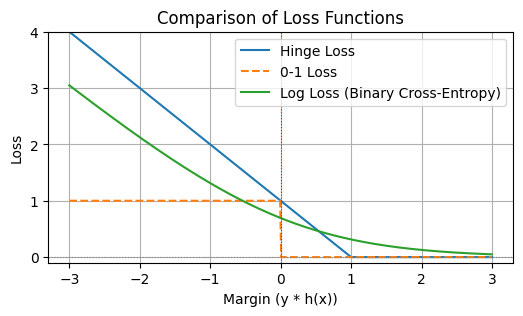

In [ ]:
'''
For a Perceptron classifier
plotting of the highle loss, 0-1 loss, and log loss
'''

####**SVM Algorithm**

In the Perceptron classifier we evaluate the performance of our classifier by minimizing the expected loss function (empirical risk). One of the problems with current method is that there are multiple classifiers (multiple parameter values $\theta$ and $\theta_0$ ) that can achieve the same empirical risk. How do we choose the best model and what does the best mean?


One solution is to regularize the loss function to favor small parameter values,
$$L_n(\theta, \theta_0) = \frac{\lambda}{2} \|\theta\|^2 + \frac{1}{n} \sum_{i=1}^{n} \text{Loss}(y_i(\theta \cdot x_i + \theta_0))$$


The regularization applies to $\theta$ but not $\theta_0$. The reason is because $\theta$ specifies the orientation of a decision boundary whereas $\theta_0$ is related to its offest from the origin.


We first classify the data points correctly, and secondly to be maximally removed from the training examples. We compute and maximize the distance from every training example to the decision boundary. Geometrically this distance is
$$y_i = \frac{y_i(\theta \cdot x_i + \theta_0)}{\|\theta\|}$$


To maximize the margin, we maximize the minimum distance to the decision boundary across all data points ($max$($min_iyi$)). We formulate this as quadratic program with linear constraints, which is an optimization problem that involves optimizing a quadratic objective function subject to linear constraints on the variables.

$$
\begin{aligned}
&  \text{primal } \quad  \min_{\theta, \theta_0} \frac{1}{2} \|\theta\|^2 \quad  \text{subject to } y_i (\theta^\top x_i + \theta_0) \geq 1, \quad i = 1, \dots, n
\end{aligned}
$$

We are essentially minimizing the regularized loss function by choosing theta with a small $l2$ norm subject to the constraints that each training pair is correctly classified. The training data points that lie on the margin boundaries become support vectors. We need a subset of support vectors to fully learn SVM model parameters.


We obtain the dual form by writing out the Lagrangian
$$\max L(\theta, \theta_0, \alpha) = \frac{1}{2} \|\theta\|^2 - \sum_{i=1}^{N} \alpha_i \left[ y_i (\theta \cdot x_i + \theta_0) - 1 \right]$$


Making the substitutions in the Lagrangian form we get it in the form we use in the SVM algorithm

In the dual form, the d-dimensional data points $x_i$ and $x_j$ interact via the inner products, that measures the degree of similarity between two vectors generalized via kernels $K(x_i, x_j)$. Kernels measure the similarity between two objects without explicitly representing them as featured vectors. There is a variety of kernels, and we use one popular kernel for $SVM$ that is radial basis function ($RBF$) kernel.
$$K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)$$


We now implement the $SVM$ algorithm using an optimization package, $CVXOPT$.
1. The standard form of quadratic program, is
$$
\begin{aligned}
& \min_{x} \left( \frac{1}{2} x^T P x + q^T x \right)
\quad  \text{subject to } \quad Gx \leq h \quad \quad Ax = b
\end{aligned}
$$

The objective function is convex iff matrix $P$ is positive semidefinite. We expect the problem parameterized by ($P, q, G, h, A, b$). We convert our dual $QP$ into this form.
Let $P$ be $P_{ij} = y_i y_j [x_i^T x_j]$


2. The optimization program becomes
$$
\begin{aligned}
\max_{\alpha} \quad & \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \alpha^T \mathbf{P} \alpha \quad
\text{subject to} \quad \alpha_i \geq 0, \quad \forall i \sum_{i=1}^{n} \alpha_i y_i = 0
\end{aligned}
$$

This can further modify the $QP$, turning this into a minimization problem and reverses the inequality.
$$
\begin{aligned}
\min_{\alpha} \quad & \frac{1}{2} \alpha^T P \alpha - \mathbf{1}^T \alpha \quad
\text{subject to} \quad -\alpha_i \leq 0, \quad \forall i \quad  y^T \alpha = 0
\end{aligned}
$$



$
\begin{array}{l}
\textbf{class } \text{SVM} \\
\quad \textbf{Function } \text{fit}(X, y): \\
\quad \quad P_{ij} = y_i y_j K(x_i, x_j) \quad \text{# formulate the SVM quadratic program} \\
\quad \quad q = -1; \quad G_{ij} = -1; \quad h = 0; \quad A = y; \quad b = 0 \\
\quad \quad \text{solver} = \text{cvxopt.solvers.qp}(P, q, G, h, A, b) \quad \text{# solves with cvxopt} \\
\quad \quad \alpha = \text{solver}[x] \\
\quad \quad S = \alpha > 10^{-4} \quad \text{# finds support vectors} \\
\quad \quad \theta = \sum y_i \alpha_i x_i \quad \text{# finds the normal vector} \\
\quad \quad \theta_0 = y_s - \sum (\alpha_m y_m) (x_m^T x_s) \quad \text{# finds the intercept} \\
\quad \quad \textbf{return } \theta, \theta_0
\\
\quad \mathbf{Function} \text{ predict}(X, \theta, \theta_0): \\
\quad \quad \hat{y} = \text{sign}(\theta^T X + \theta_0) \quad \text{\# makes a prediction} \\
\quad \quad \mathbf{return} \ \hat{y}
\end{array}
$

$SVM$ class consists of two functions $fit$ and $predict$. In the $fit$ function we start off by formulating the quadratic problem to solve with $CVXOPT$, and defining all input parameters ${P, q, G, h, A, b}$. Solver finds the support vectors as $alphas >0$. Next we compute the normal vector and the intercept. In the predict function we use the computed normal and intercept support vectors to make a label prediction on test data.

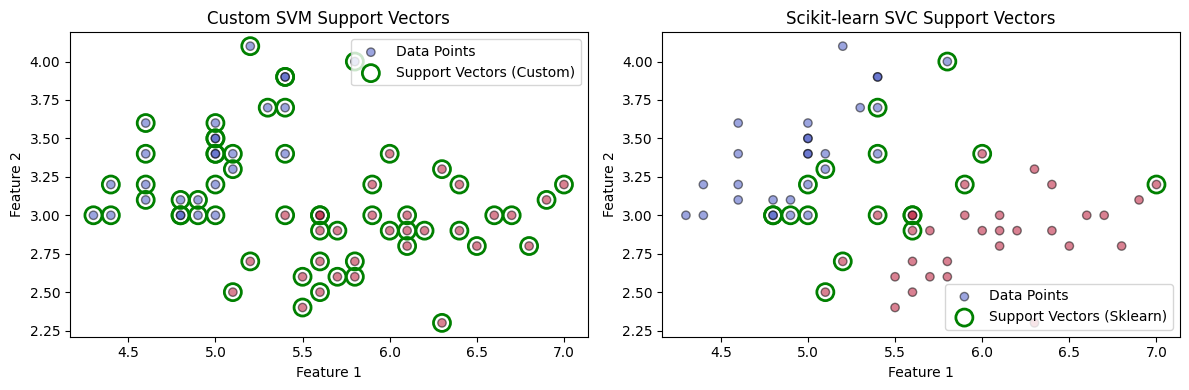

In [ ]:
''' Custom SVM Support Vectors '''

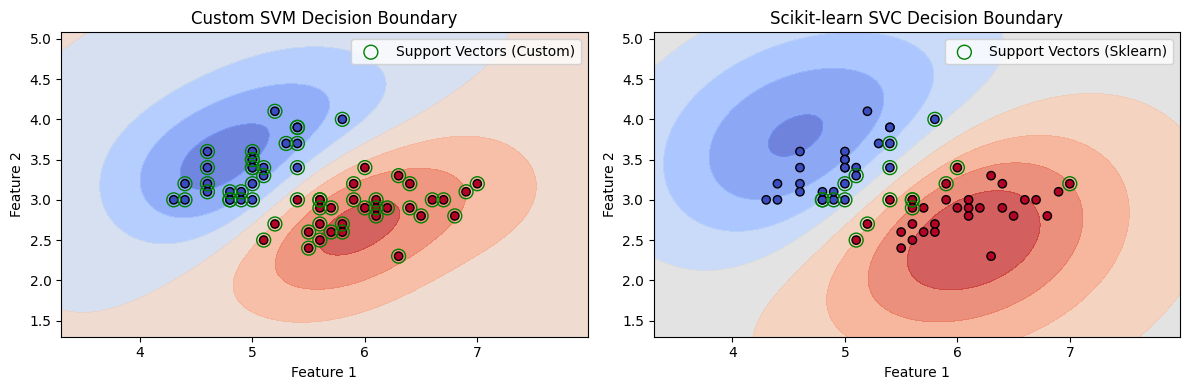

In [ ]:
''' SVM Decision Boundary '''

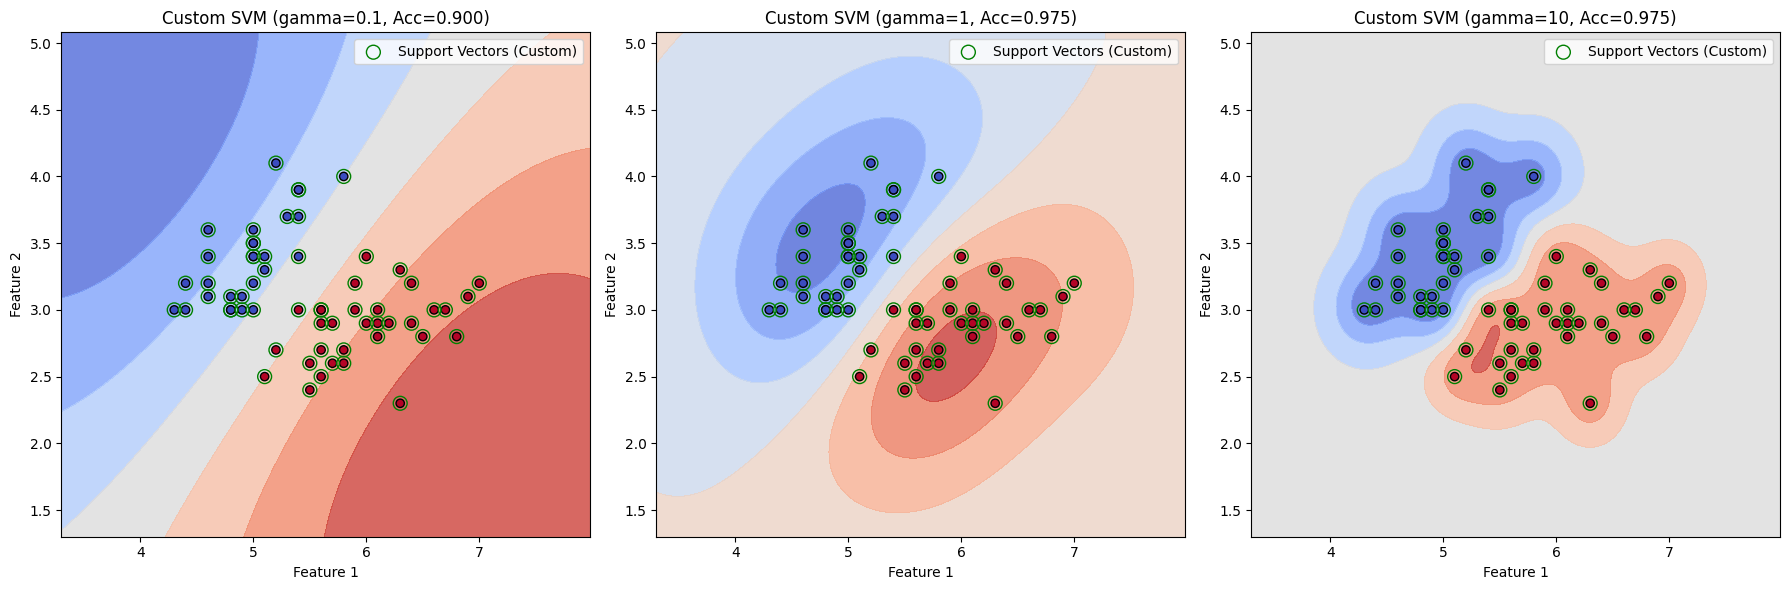

In [ ]:
''' Vary the gamma parameter for the custom SupportVectorMachine, and its impact on accuracy and decision boundaries '''

####**Logistic regression - SGD**

Logistic regression is a classification algorithm. In a probabilistic view of classification we care interested in computing $p(C_k|x)$ the probability class label $Ck$ given the input data $x$. Consider two classes $C1$ and $C2$, we use Bayes rule to compute posterior probability.
$$
\begin{aligned}
p(C_1|x) &= \frac{p(x|C_1)p(C_1)}{p(x|C_1)p(C_1) + p(x|C_2)p(C_2)}
= \frac{1}{1 + \frac{p(x|C_2)p(C_2)}{p(x|C_1)p(C_1)}}
= \frac{1}{1 + \exp(-a)}
= \sigma(a)
\end{aligned}
$$

$a = \ln\left(\frac{p(x|C_1)p(C_1)}{p(x|C_2)p(C_2)}\right)$

In multiclass scenario $K>2$, we have the following
$$
P(C_k| \mathbf{x}) = \frac{p(\mathbf{x}|C_k)P(C_k)}{\sum_{i} p(\mathbf{x}|C_i)P(C_i)} = \frac{\exp(a_k)}{\sum_{i} \exp(a_i)}
$$

$
a_k = \ln (p(\mathbf{x}|C_k)P(C_k))
$



This expansion is known as softmax function, it takes a vector of $K$ real values and transforms it into a vector of $K$ real values that sum up to 1. This is also interpreted as probability distribution.


Now it becomes a matter of choosing conditional densities that model the data well. In the case of binary logistic regression parameterized by $\theta$ with class label $y= c_k$
$$
p(C_k| x) = p(y | x, \theta) = \text{Ber}(y | \sigma(\theta^T x))
$$


We compute
$$
p(x_i, y_i \mid \theta) = p(y_i \mid x_i, \theta) = \text{Ber}(y \mid \sigma(\theta^T x)) p(x_i \mid \theta)
$$

Since we are not modeling the distribution of data $p(x_i|\theta) = p(x_i)$ we tale the log likelihood.
$$
\log(p(D|\theta)) = \log\left(\prod_{i} p(x_i, y_i |\theta)\right) = \sum_{i} \log(p(x_i, y_i | \theta))
$$



Now that we would like to maximize the log likelihood, we minimize the loss or negative likelihood ($NLL$).
$$
\min_{\theta} (\text{Loss}(\theta)) = \min_{\theta} (\text{NLL}(\theta)) = \max_{\theta} (\log(p(D|\theta)))
$$

We minimize the logistic regression via SGD
$\theta_{k+1} = \theta_k - \eta_k g_k$ here, $g_k$ is the gradient and $n_k$ is the step size. To guarantee the SGD, with known conditions (Robbins Monro), the learning rate must be satisfied.
$$
\sum n_k = \infty, \quad \sum n_k < \infty, \quad n_k = (\tau_0 + k)^{-K}
$$


After we also add regularization to control parameter size, the objective and the gradient becomes


$$\min_{\theta} \text{Loss}(\theta) = \min_{\theta} [ \text{NLL}(\theta) + \lambda \theta^T \theta ]\quad g_k = X^T(\mu - y) + 2\lambda \theta
$$

**SGD Algorithm**

The Objective Function computes the regularized negative log-likelihood (Cross-Entropy Loss) and its gradient. Fit Function performs parameter optimization using a power-law decaying learning rate $\eta_i$. Predict Function Computes the probability

**class sgd_lr**

$
\begin{aligned}
&\textbf{Function } \text{lr\_objective}(\theta, X, y, \lambda): \\
&\quad \mu_i = \sigma(\theta^T X_i) = \frac{1}{1 + e^{-\theta^T X_i}} \\
&\quad J(\theta) = -\sum_{i=1}^{n} \left[ y_i \log(\mu_i) + (1 - y_i) \log(1 - \mu_i) \right] + \lambda \theta^T \theta \\
&\quad \nabla_{\theta} = X^T(\mu - y) + 2\lambda \theta \\
&\quad \textbf{return } J(\theta), \nabla_{\theta}
\end{aligned}
$


$
\begin{aligned}
&\textbf{Function } \text{fit}(X, y, \tau, \kappa, \text{num\_iter}): \\
&\quad \textbf{for } i = 1, 2, \dots, \text{num\_iter} \textbf{ do:} \\
&\quad \quad \eta_i = (\tau + i)^{-\kappa} \quad \text{// Set learning rate} \\
&\quad \quad J, \nabla_{\theta} = \text{lr\_objective}(\theta, X, y, \lambda) \\
&\quad \quad \theta = \theta - \eta_i \nabla_{\theta} \quad \text{// Update weights} \\
&\quad \textbf{end for} \\
&\quad \textbf{return } \theta
\end{aligned}
$


$
\begin{aligned}
&\textbf{Function } \text{predict}(X, \theta): \\
&\quad \hat{y} = \sigma(\theta^T X) \\
&\quad \textbf{return } \hat{y}
\end{aligned}
$

The $sgd_lr$ class has three  main functions, $lr_objective$ computes regularized objective function and the gradient of the objective, the $fit$ function sets the learning rate and for each iteration updates the $theta$ parameters in the direction opposite to gradient, and predict function makes a binary prediction of the label based on test data.

In this code we use Gaussian mixture dataset to train the logistic regression model. The plotting shows the stochastic nature of the loss function that decreases with the number of iterations as well as the decision boundary learned by the model.

A natural extension to the binary logistic regression is the **multinomial (multiclass) logistic regression**.

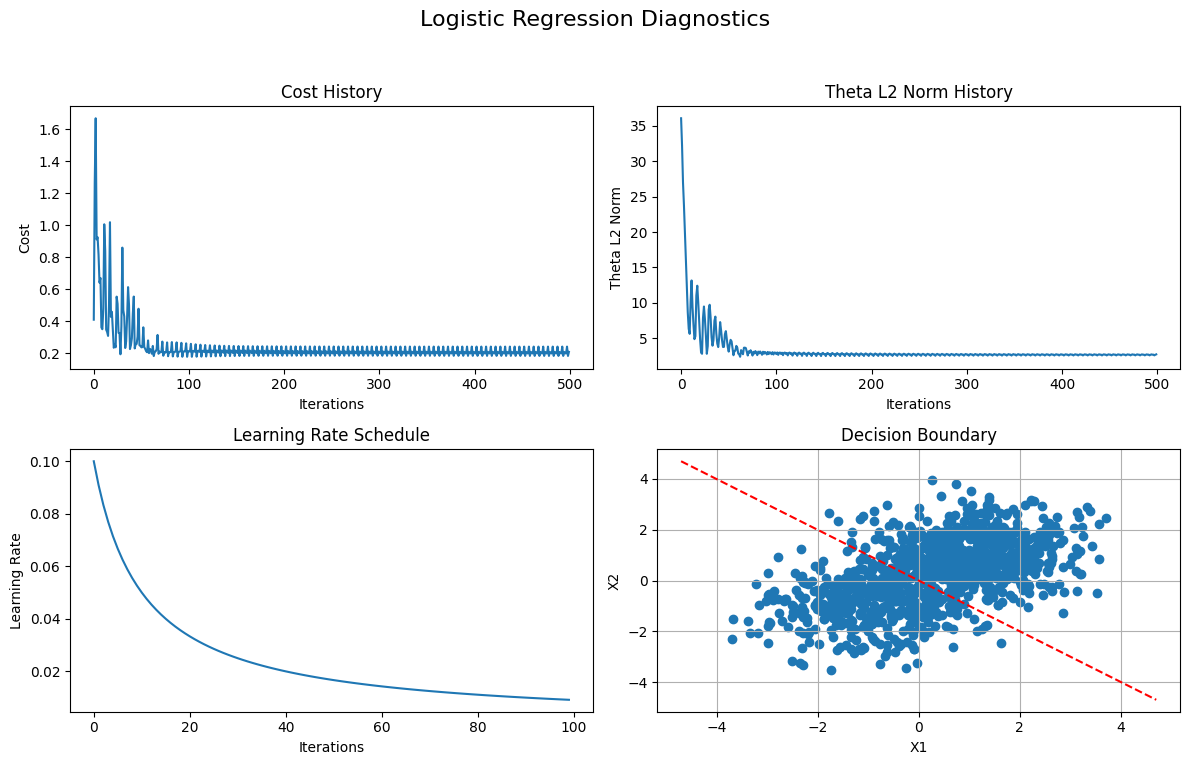

In [ ]:
''' Logistic Regression'''

**Regularization Visualization**


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.661e-01, tolerance: 9.924e-04
  model = cd_fast.enet_coordinate_descent(


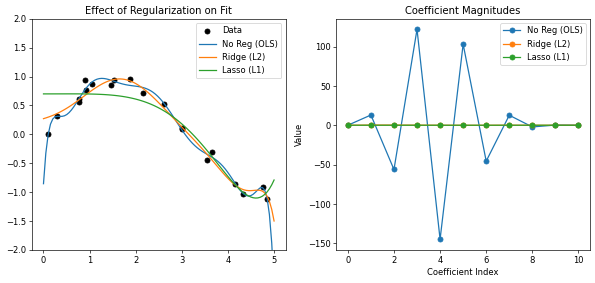

In [ ]:
""" Regularization Visualization """

<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2986146758.py:31: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(X_plot, model.predict(X_plot), color='green', label=f'Best Fit ($\lambda$={best_lambda:.4f})')


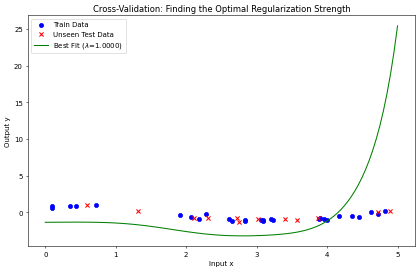

The optimal regularization parameter found via CV is: 1.0


In [ ]:
""" Cross-Validation for Regularization """

####**Naive Bayes Algorithm**

The fundamental assumption of the algorithm is that the features are conditionally independent given the class label. We write the class conditional density as a product of one dimensional densities.
$$
p(x_i \mid y=c, \theta) = \prod_{j=1}^{D} p(x_{ij} \mid y=c, \theta_{jc})
$$


The model is called naive because we don't expect the features to be conditionally independent, however if this is not true, the model performs well in many scenarios. We focus on Bernoulli Naive Bayes for document classification.


The choice of class conditional density p(x| y=c, theta) determines the type of Naive Bayes classifier such as Gaussian, Bernoulli or multinomial.

Let $x_ij$ be Bernoulli rvs $(x_ij=0$ or $1) of a ord j in ${1,...,D}$ for document $i$ in ${1,...,N}$, parameterized by theta_jc for a given class label $y = c$ in ${1,...,C}$. Let n be Dirichlet distribution representing the prior
over the class labels. The total number of learnable parameters is |θ|+|π| = O(DC) + O(C) = O(DC), where D is the dictionary size and C is the number of classes. Due to the small number of parameters, the Naive Bayes model is immune to overfitting.

The class conditional density
\begin{equation}
p(x | y=c, \theta) = \prod_{i=1}^{n} \prod_{j=1}^{D} \text{Bernoulli}(x_{ij} | \theta_{jc})
\end{equation}


We can derive the Naive Bayes inference algorithm by maximizing the log likelihood. Consider the words $x_i$ in a single document $i$.

Using Naive Bayes assumption, we compute the log likelihood objective $log(p(D| \theta))$.
$$ \log(p(D|\theta)) = \log\left(\prod_{i=1}^{n} p(x_i, y_i|\theta)\right) $$

This is a constrained optimization program with probs. of class labels summing to 1. We solve the optimization problem using a Lagrangian by including the constraint in the objective function and setting the gradient of the Lagrangian.
$L(\theta, \lambda)$ with respect to model parameters to 0.

$$
L(\theta, \lambda) = \log(p(D | \theta)) + \lambda \left( 1 - \sum_{c} \text{class}_c \right)
$$

Making substitutions and differentiating, we get optimum **maximum likelihood estimation** (**MLE**) value of $\theta_jc = N_jc/N_c$, where $N_c = Sum I[y_i =c]$
We add a Beta conjugate prior for the Bernoulli rvs and Dirichlet conjugate prior for the class density to smooth the $MLE$ counts.
$$p(\text{class}\mid D) = \text{Dir}(N_1 + \alpha_1, \dots, N_c + \alpha_c)$$

$$p(\theta_{jc}\mid D) = \text{Beta}((N_c - N_{jc}) + \beta_0, N_{jc} + \beta_1)$$

During test time, we predict the class label y given the training data D and the learned model parameters. Applying Bayes rule, we get
$$
P(y = c \mid x_{i,1}, \dots, x_{i,D}, D) \propto P(y = c \mid D) P(x_{i,1}, \dots, x_{i,D} \mid y = c, D)
$$
$$
= P(y = c \mid D) \prod_{j=1}^{D} P(x_{i,j} \mid y = c, D)
$$

We make substitutions and take the log to get the term we use in the testing function of the algorithm.




####**Naive Bayes Algorithm**

$
\begin{array}{l}
\mathbf{Algorithm:\ Bernoulli\ NB\ Training} \\
\hline
\text{ Initialize } N_c = 0, N_{jc} = 0 \\
\text{ } \mathbf{for} \ i = 1, 2, \dots, n \ \mathbf{do} \\
\text{ } \quad c = y_i \\
\text{ } \quad N_c = N_c + 1 \\
\text{ } \quad \mathbf{for} \ j = 1, \dots, D \ \mathbf{do} \\
\text{ } \quad \quad \mathbf{if} \ x_{ij} = 1 \ \mathbf{then} \\
\text{ } \quad \quad \quad N_{jc} = N_{jc} + 1 \\
\text{ } \quad \quad \mathbf{end\ if} \\
\text{ } \quad \mathbf{end\ for} \\
\text{ } \mathbf{end\ for} \\
\text{ } \hat{\pi}_c = \frac{N_c}{N}, \ \hat{\theta}_{jc} = \frac{N_{jc}}{N_c} \\
\text{ } \mathbf{return} \ \hat{\pi}_c, \hat{\theta}_{jc} \\
\hline
\end{array}
$



$
\begin{array}{l}
\mathbf{Algorithm:\ Bernoulli\ NB\ Inference\ (Single\ Document)} \\
\hline
\text{ } \mathbf{for} \ c = 1, 2, \dots, C \ \mathbf{do} \\
\text{ } \quad \log P(c|x) = \log \hat{\pi}_c \\
\text{ } \quad \mathbf{for} \ j = 1, 2, \dots, D \ \mathbf{do} \\
\text{ } \quad \quad \mathbf{if} \ x_j = 1 \ \mathbf{then} \\
\text{ } \quad \quad \quad \log P(c|x) = \log P(c|x) + \log \hat{\theta}_{jc} \\
\text{ } \quad \quad \mathbf{else} \\
\text{ } \quad \quad \quad \log P(c|x) = \log P(c|x) + \log (1 - \hat{\theta}_{jc}) \\
\text{ } \quad \quad \mathbf{end\ if} \\
\text{ } \quad \mathbf{end\ for} \\
\text{ } \mathbf{end\ for} \\
\text{ } \hat{y} = \arg\max_{c} \log P(c|x) \\
\text{ } \mathbf{return} \ \hat{y} \\
\hline
\end{array}
$

The runtime complexity of MLE inference is O(ND),  N is the number
of training documents and D is the dictionary size.

####**Decision tree (CART) Algorithm**

Classification and regression trees algorithm (CART), is a tree based algorithm that partitions the input space into axis parallel regions such that each leaf represents a region.



In tree-based models during training we construct a binary tree in a way that it optimizes an objective function and does not lead to underfitting or overfitting. Key determinant in growing a decision tree is the choice of feature and the threshold to use when classifying the data points.



Consider an input matrix $X_nxd$ with n data points of dimension - feature size d, we would like to find the optimum feature and threshold for that feature that results in the split of the data with minimum cost.


Let $j$ in ${1,...,d}$ represent feature dimension and $t$ in $T_j$ represent a threshold for feature $j$ out of all possible thresholds $T_j$. Then we compute,
$$
j^*, t^* = \mathop{\arg\min}_{j \in \{1, \dots, d\}} \min_{t \in T_j} \left[ \text{cost}(\{x_i, y_i : x_{i,j} \le t\}) + \text{cost}(\{x_i, y_i : x_{i,j} > t\}) \right]
$$

Our goal in defining a cost function is to evaluate how good our data partition is.
CART algorithm is finding the optimal feature and threshold such that the cost is minimized.

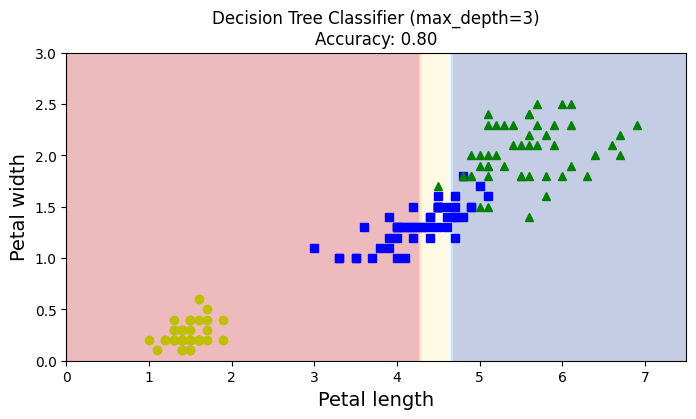

In [ ]:
''' Decision Tree Classifier '''